# Evaluation and Analysis of insurance claim Project

Quit warnings

In [10]:
from warnings import simplefilter
simplefilter(action='ignore')

Import all the necessary packages for the prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
insurancedf = pd.read_csv("insurance2.csv")
insurancedf.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Check the data for null values

In [13]:
insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


No nullvalues in the dataset

Let's do the statistical analysis

In [3]:
insurancedf.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


This gives the co-relation between the various features of the database.

In [4]:
#corr = insurancedf.corr();
#print(corr)
#sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
#plt.show()

This gives the count of the various fields based on whether the insurance claim was requested or not

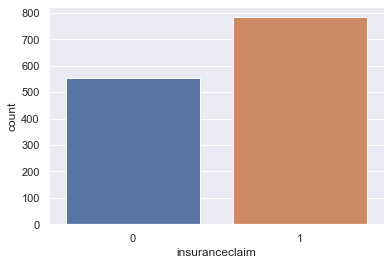

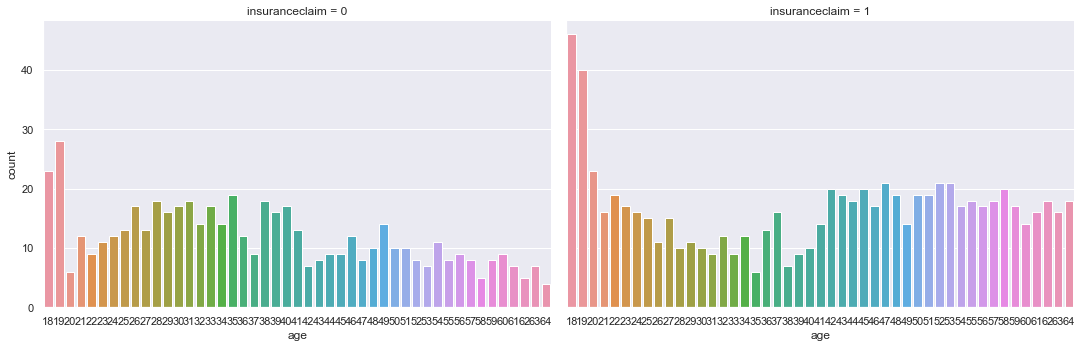

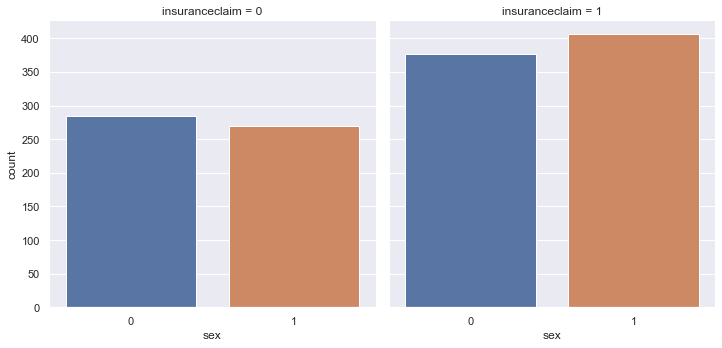

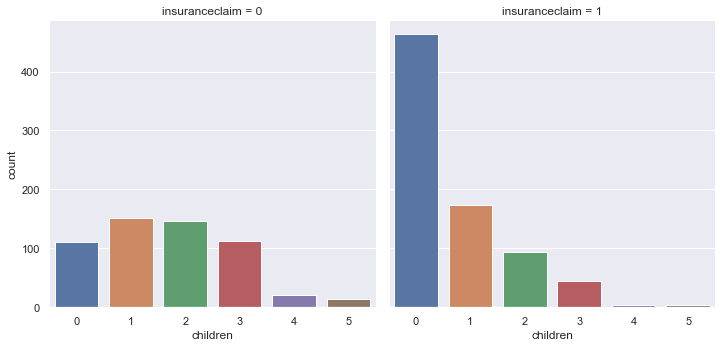

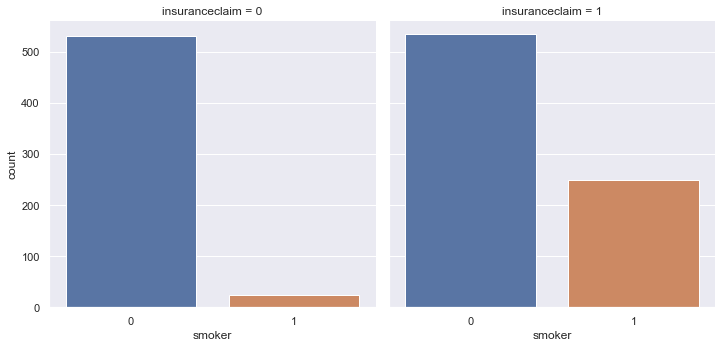

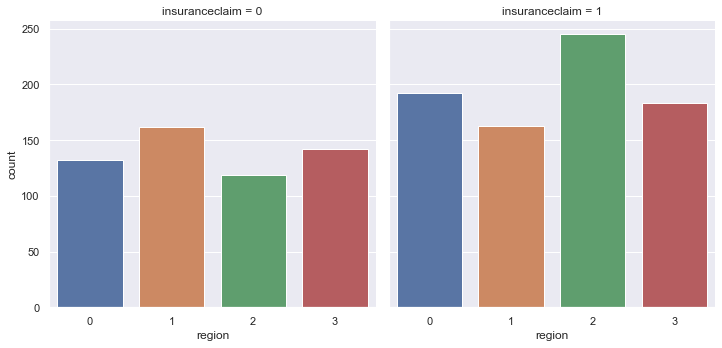

In [5]:
sns.set(style="darkgrid")
sns.countplot(x='insuranceclaim',data=insurancedf)
sns.catplot(x="age", col="insuranceclaim",data=insurancedf, kind="count", aspect=1.5)
sns.catplot(x="sex", col="insuranceclaim",data=insurancedf, kind="count")
sns.catplot(x="children", col="insuranceclaim",data=insurancedf, kind="count")
sns.catplot(x="smoker", col="insuranceclaim",data=insurancedf, kind="count")
sns.catplot(x="region", col="insuranceclaim",data=insurancedf, kind="count")
plt.show()


This specifies the size of the dataset to be used for Model Training. Specify the range in [ : ] to select a portion of the dataset.

In [6]:
df_train = insurancedf[:]

In [19]:
#df_train

Apply Logistic Regression Model for the dataset.

In [8]:
trainLabel = np.asarray(df_train['insuranceclaim'])
trainData = np.asarray(df_train.drop('insuranceclaim',1))
#trainData

In [11]:

#means = np.mean(trainData, axis=0)
#stds = np.std(trainData, axis=0)
#trainData = (trainData - means)/stds

In [47]:
#trainData

In [9]:
#check using zscore directly
import scipy.stats as stats
trainData = stats.zscore(trainData)
#trainData

In [10]:
insuranceCheck = LogisticRegression(solver="lbfgs")
insuranceCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
normalized_col = list(insurancedf.columns)[:7]
normalized_col

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [13]:
#normalized data in tables
df_normalized = pd.DataFrame(data=trainData, columns= normalized_col)
df_normalized.head(10)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
5,-0.584350,-1.010519,-0.807656,-0.908614,-0.507463,0.438495,-0.785908
6,0.483668,-1.010519,0.455486,-0.078767,-0.507463,0.438495,-0.415500
7,-0.157143,-1.010519,-0.479567,1.580926,-0.507463,-0.466915,-0.494728
8,-0.157143,0.989591,-0.136714,0.751079,-0.507463,-1.372326,-0.567017
9,1.480485,-1.010519,-0.791252,-0.908614,-0.507463,-0.466915,1.293027


In [45]:
#insuranceCheck?

In [16]:
#labels = list(df_train.drop('insuranceclaim',1).columns)
#labels
features

,importance,positive
Features,,
children,-1.676308,False
region,-0.099463,False
sex,-0.006560,False
charges,0.101094,True
age,0.357730,True
bmi,1.536982,True
smoker,1.567824,True


Plotting Feature Chart to get the influence of various parameters on the Insurance Prediction Claim.

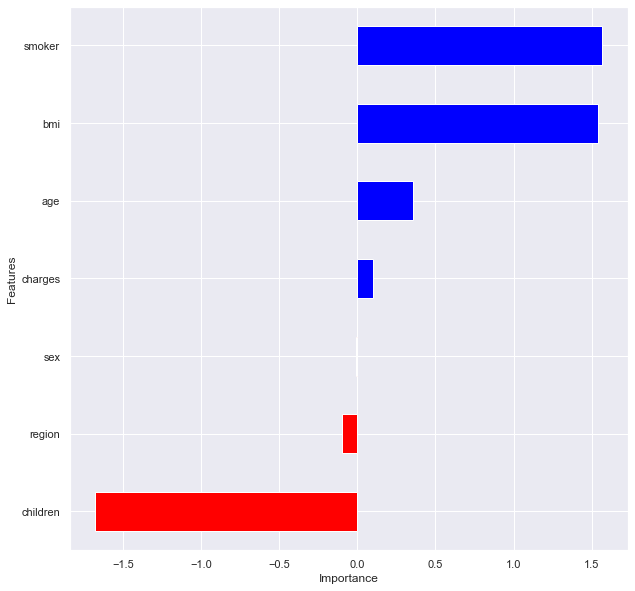

In [15]:
coeff = list(insuranceCheck.coef_[0]) #get the coefficients
labels = list(df_train.drop('insuranceclaim',1).columns)  #get the columns
features = pd.DataFrame() #create a dataframe
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 10),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()


The following conclusion can be drawn from the above Feature Chart:-

1. BMI, Smoker have significant influence on the model, specially BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!

2. Children has a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policyholder not taken insurance claim.

3. Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that our input data is normalized. Without that, we can't claim that importance is proportional to weights.

Firstly, the model is trained 100 times using train_test_split. And this Process is again repeated for 100 times to get more accurate model.

List 'z' stores the the maximum Percentage Accuracy Score (PAS) of each Internal Iteration


Prediction

In [17]:
z = []

In [18]:
m=0
me=0
for j in range(0,100):
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(trainData,trainLabel)
        insuranceCheck.fit(x_train,y_train)
        yp=insuranceCheck.predict(x_test)
        p=accuracy_score(y_test,yp)
        if p>=m:
            m=p
            me = mean_absolute_error(y_test, yp)
    z.append(m*100)
print("Highest Accurate Model Accuracy Score=>",max(z),'%')
print("MAE=>",me)

Highest Accurate Model Accuracy Score=> 93.73134328358209 %
MAE=> 0.0626865671641791
